In [2]:
##Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#Loading DataSet
data = pd.read_csv('C:/Users/yuvar/OneDrive/Desktop/DataAnalytics_Project/heart_statlog_cleveland_hungary_final.csv')

In [4]:
data


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [5]:
#X = data.drop('target', axis=1)  # Assuming 'class' is the dependent variable
#Y = data['target']

In [6]:
import pandas as pd
import numpy as np
from scipy import stats

target_column = 'target'

# Columns to exclude from Cramer's V calculation
exclude_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# List to store correlation coefficients
correlation_matrix = []

# Iterate through each column in 'data'
for column in data.columns:
    if column != target_column and column not in exclude_columns:
        # Create a contingency table
        contingency_table = pd.crosstab(data[column], data[target_column])

        # Finding Chi-squared test statistic, sample size, and minimum of rows and columns
        X2 = stats.chi2_contingency(contingency_table, correction=False)[0]
        N = np.sum(contingency_table.values)
        minimum_dimension = min(contingency_table.shape)-1

        # Calculate Cramer's V
        cramers_v = np.sqrt((X2/N) / minimum_dimension)

        # Append the result to the correlation matrix
        correlation_matrix.append([column, cramers_v])

# Convert the list to a DataFrame
correlation_df1 = pd.DataFrame(correlation_matrix, columns=['Column', 'Cramers_V'])

# Displaying the correlation matrix
correlation_df1


,Column,Cramers_V
0,sex,0.311267
1,chest pain type,0.530117
2,fasting blood sugar,0.216695
3,resting ecg,0.123609
4,exercise angina,0.481467
5,ST slope,0.570474


In [7]:

target_column = 'target'

# Columns for which to calculate point biserial correlation
columns_to_compare = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# List to store correlation coefficients
correlation_matrix = []

# Iterate through each column in 'data'
for column in columns_to_compare:
    # Calculate point biserial correlation coefficient
    point_biserial_corr, p_value = stats.pointbiserialr(data[column],data[target_column])
    
    # Append the result to the correlation matrix
    correlation_matrix.append([column, point_biserial_corr, p_value])

# Convert the list to a DataFrame
correlation_df2 = pd.DataFrame(correlation_matrix, columns=['Column', 'Point Biserial Corr', 'P-Value'])

# Displaying the correlation matrix
correlation_df2


,Column,Point Biserial Corr,P-Value
0,age,0.262029,3.906913e-20
1,resting bp s,0.121415,2.674903e-05
2,cholesterol,-0.198366,5.039823e-12
3,max heart rate,-0.413278,2.694125e-50
4,oldpeak,0.398385,1.512669e-46


In [44]:
# Merge DataFrames on the 'Column' column
merged_df = pd.merge(correlation_df1, correlation_df2, on='Column', how='outer')

# Create a new DataFrame with the desired columns
correlation_matrix = pd.DataFrame({
    'Column': merged_df['Column'],
    'Correlation Coefficient': merged_df['Cramers_V'].combine_first(merged_df['Point Biserial Corr'])
})
# Sort the DataFrame by the absolute values of the correlation coefficients in descending order
correlation_matrix = correlation_matrix.reindex(correlation_matrix['Correlation Coefficient'].sort_values(ascending=False).index)
# Displaying the final result
correlation_matrix

,Column,Correlation Coefficient
5,ST slope,0.570474
1,chest pain type,0.530117
4,exercise angina,0.481467
10,oldpeak,0.398385
0,sex,0.311267
6,age,0.262029
2,fasting blood sugar,0.216695
3,resting ecg,0.123609
7,resting bp s,0.121415
8,cholesterol,-0.198366


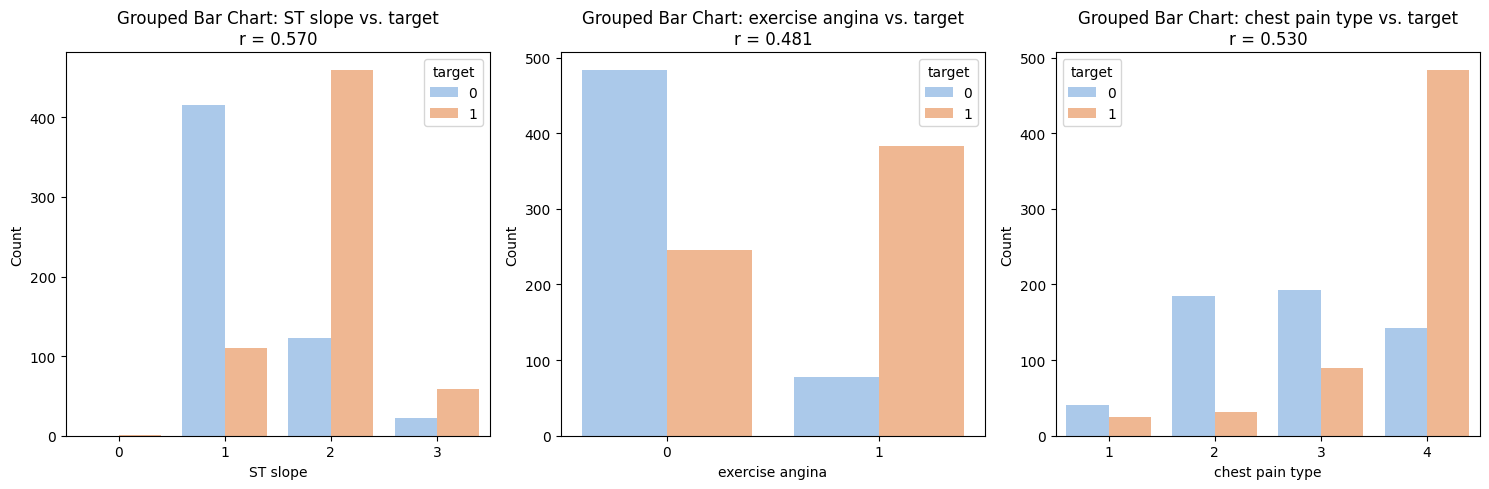

In [21]:
# Reason for high correlation ( Nominal )

top_three_correlations = ['ST slope', 'exercise angina', 'chest pain type']

plt.figure(figsize=(15, 5))

for i, attribute in enumerate(top_three_correlations, 1):
    # Get the pre-calculated correlation coefficient
    correlation_coefficient = correlation_matrix.loc[correlation_matrix['Column'] == attribute, 'Correlation Coefficient'].iloc[0]

    plt.subplot(1, 3, i)
    sns.countplot(x=attribute, data=data, hue='target', palette='pastel')
    plt.title(f'Grouped Bar Chart: {attribute} vs. target\nr = {correlation_coefficient:.3f}')
    plt.xlabel(attribute)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

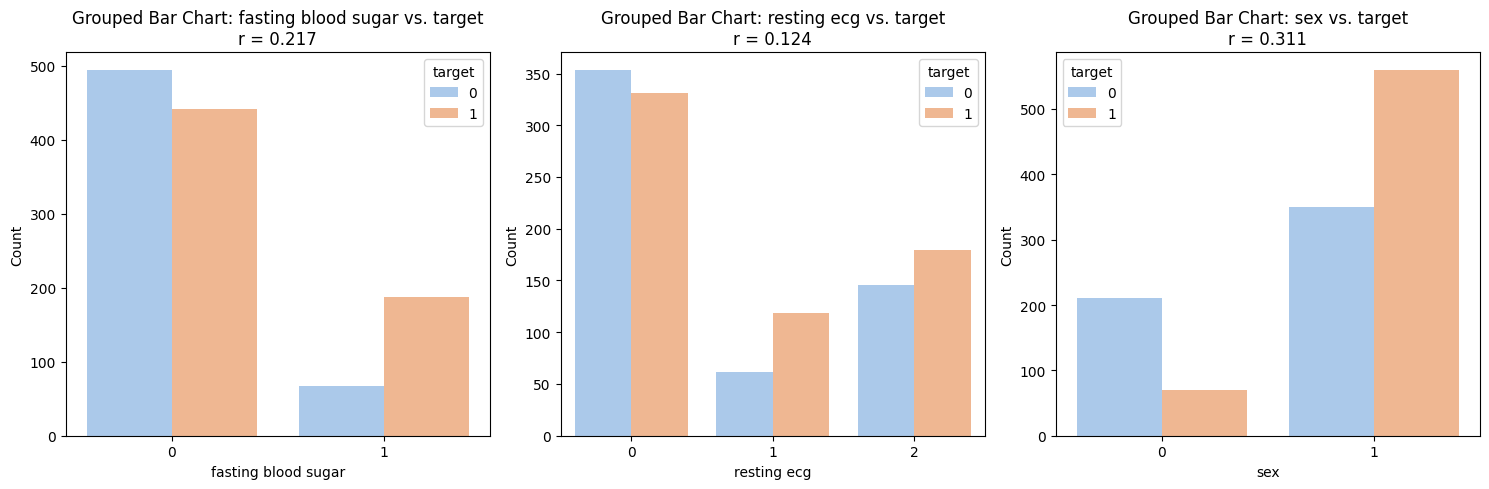

In [22]:
#Reason for low correlation ( Nominal )

three_correlations = ['fasting blood sugar', 'resting ecg', 'sex']

plt.figure(figsize=(15, 5))

for i, attribute in enumerate(three_correlations, 1):
    # Get the pre-calculated correlation coefficient
    correlation_coefficient = correlation_matrix.loc[correlation_matrix['Column'] == attribute, 'Correlation Coefficient'].iloc[0]

    plt.subplot(1, 3, i)
    sns.countplot(x=attribute, data=data, hue='target', palette='pastel')
    plt.title(f'Grouped Bar Chart: {attribute} vs. target\nr = {correlation_coefficient:.3f}')
    plt.xlabel(attribute)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

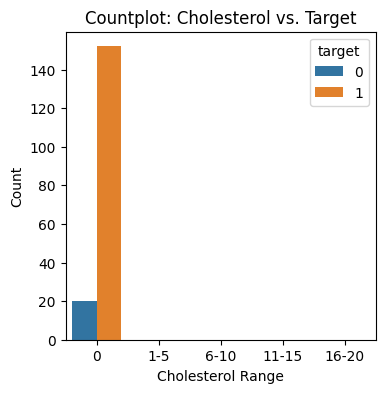

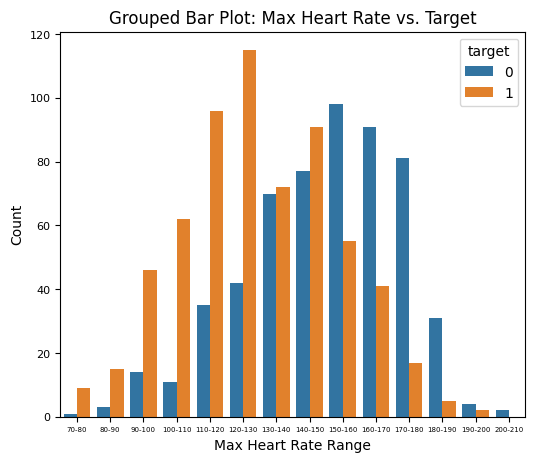

In [33]:
# Reason for Negative correlation 

#cholesterol 

bins = [-1, 0, 5, 10, 15, 20]  # -1 to include 0 in the first bin
labels = ['0', '1-5', '6-10', '11-15', '16-20']

# Bin the 'cholesterol' variable
data['cholesterol_bin'] = pd.cut(data['cholesterol'], bins=bins, labels=labels, include_lowest=True)

# Create the countplot
plt.figure(figsize=(4, 4))
sns.countplot(x='cholesterol_bin', hue='target', data=data, order=labels)
plt.title('Countplot: Cholesterol vs. Target')
plt.xlabel('Cholesterol Range')
plt.ylabel('Count')
plt.show()

#max heart rate

bins = list(range(70, 211, 10))
labels = [f'{start}-{end}' for start, end in zip(bins[:-1], bins[1:])]

# Bin the 'max heart rate' variable
data['max_heart_rate_bin'] = pd.cut(data['max heart rate'], bins=bins, labels=labels, include_lowest=True)

# Create the grouped bar plot
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='max_heart_rate_bin', hue='target', data=data, order=labels)

# Adjust font size of scale labels
ax.tick_params(axis='x', labelsize=5)  # Font size for x-axis labels
ax.tick_params(axis='y', labelsize=8)  # Font size for y-axis labels

plt.title('Grouped Bar Plot: Max Heart Rate vs. Target')
plt.xlabel('Max Heart Rate Range')
plt.ylabel('Count')
plt.show()

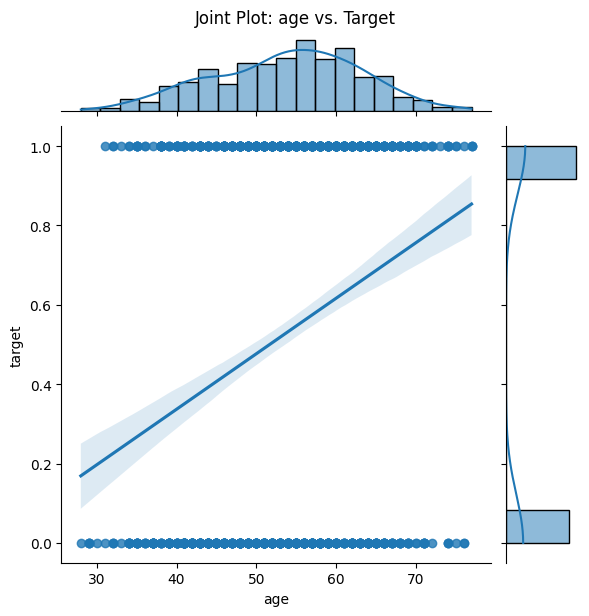

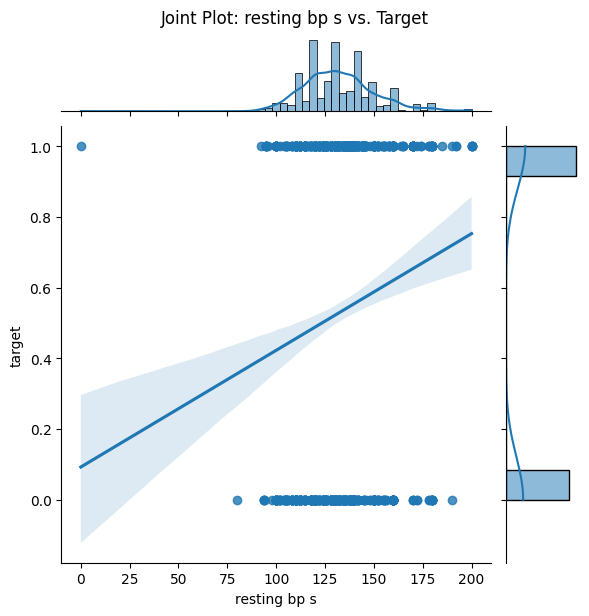

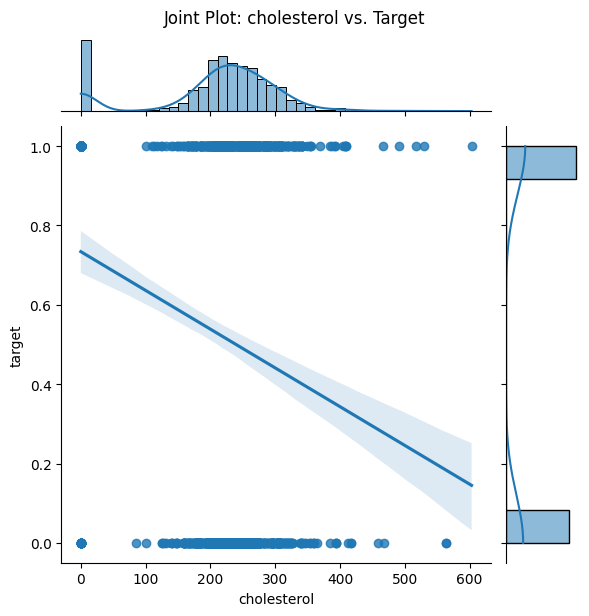

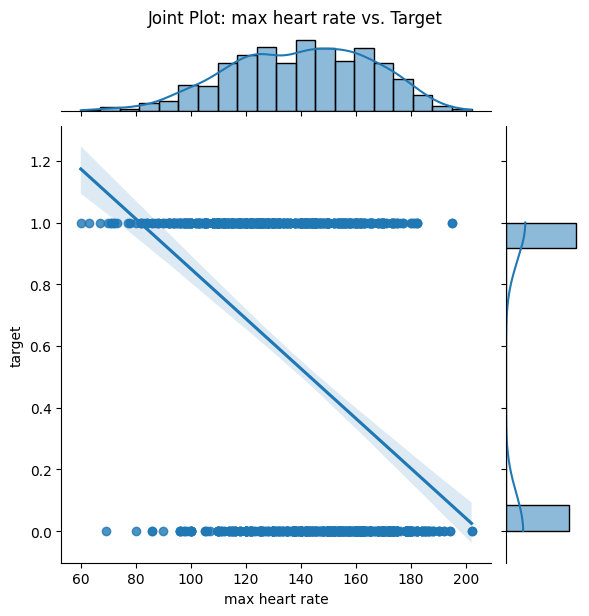

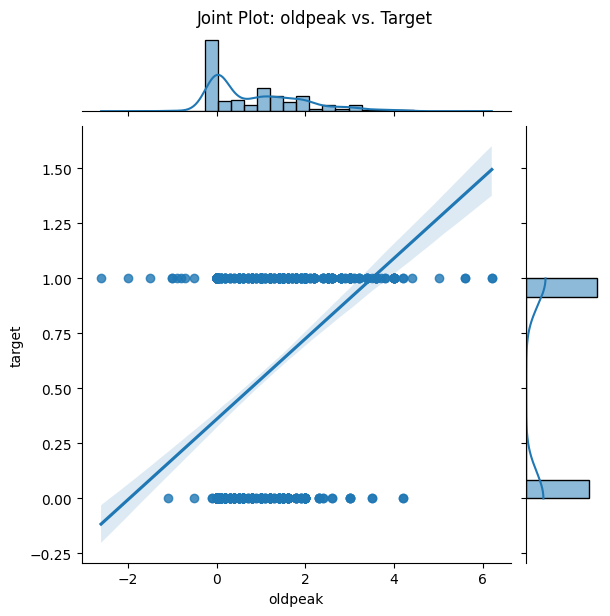

In [46]:
numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Create joint plots for each numerical feature against the target
for feature in numerical_features:
    sns.jointplot(x=feature, y='target', data=data, kind='reg')
    plt.suptitle(f'Joint Plot: {feature} vs. Target', y=1.02)
    plt.show()


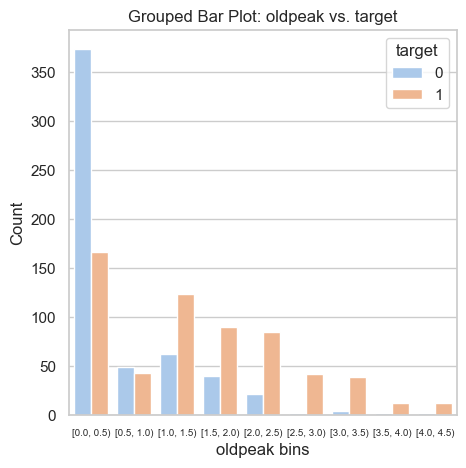

In [72]:
# Create bins for 'oldpeak'
bins = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

# Discretize 'oldpeak' into the specified bins
data['oldpeak_bins'] = pd.cut(data['oldpeak'], bins=bins, right=False)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a grouped bar plot for 'oldpeak' bins vs. 'target'
plt.figure(figsize=(5, 5))
sns.countplot(x='oldpeak_bins', hue='target', data=data, palette='pastel')

plt.title('Grouped Bar Plot: oldpeak vs. target')
plt.xlabel('oldpeak bins')
plt.ylabel('Count')
plt.legend(title='target', loc='upper right')

# Decrease the font size of x-axis scale labels
plt.xticks(fontsize=7)

plt.show()